# <center>Laboratorium 9<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

<a id='zad1'></a>
***Zadanie 1.***   

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor węzłów Czebyszewa (funkcja *chebyshev_nodes*) dany wzorem
  
  $$
  \begin{aligned}
  x(k) = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
  \end{aligned}
  $$

Oraz wagi barycentryczne dla tego typu wezłów (funkcja def *bar\_czeb\_weights*): 
$$
\begin{aligned}
w_j={}&(-1)^j\delta_j\\
\delta_j={}&
\begin{cases}
\frac{1}{2},\quad j=0\ \mathrm{lub}\ j=n\\
1,\quad j\in(0,n)
\end{cases}
\end{aligned}
$$

<a id='zad2'></a>
***Zadanie 2.***  
Do przeprowadzenia ćwiczenia należy zdefiniować następujące funkcje:  
1. Funkcję ciągłą nieróżniczkowalną: $f(x) = \mathrm{sgn}(x)x+x^2$  
2. Funkcję różniczkowalną jednokrotnie: $f(x) = \mathrm{sgn}(x)x^{2}$  
3. Funkcję różniczkowalną trzykrotnie: $f(x)=|\sin(5 x)|^3$  
4. Trzy funkcje analityczne: $f(x) = \cfrac{1}{1+ax^2}$ dla $a \in \{1,25,100\} $    
5. Funkcję nieciągłą: $f(x) = \mathrm{sgn}(x)$

Funkcje można zaimplementować w notaniku lub w pliku main. Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).


***Zadanie 3.***  
Do oceny jakości interpolacji stosuje się normę wektorową $l_{\infty}$, dla różnicy wektorów definiujemy ją jako:  
  
$||\mathbf{x_1}-\mathbf{x_2}|| = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}$  
  
Zaimplementuj normę $l_{\infty}$ jako funkcję w main *L\_inf*. Za jej pomocą zbadaj jakość wszystkich przeprowadzonych interpolacji.

***Zadanie 4.***  

Zaimlementować wzór barycentryczny podany na wykładzie jako funkcję barycentric_inte w main.py. Następnie dla funkcji ciągłej nieróżniczkowalnej przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* jak i za zaimplementowanego wzoru barycentrycznego. W tym celu należy:

 - Wykonać w węzłach Czebyszewa (zaimplementowanych w ramach zadania domowego) interpolację rzędu 10, 100, 1000, 10000, 100000.
 - Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  
 - Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  


Przykład użycia funkcji barycentric_interpolate:

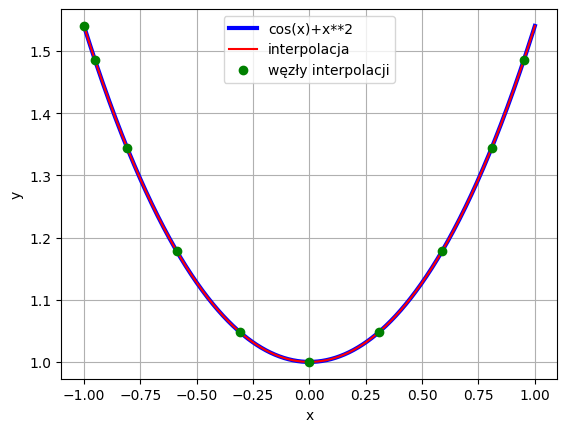

In [3]:
from scipy.interpolate import barycentric_interpolate

# funkcja do interpolacji
f = lambda x: np.cos(x)+x**2

# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
interpolation_nodes_number = 10
xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)

# interpoalcja metodą barycentryczną
yimp = barycentric_interpolate(xch,f(xch),x)

plt.plot(x,f(x),'b',  linewidth=3 ,label = 'cos(x)+x**2')
plt.plot(x,yimp,'r',label = 'interpolacja')
plt.plot(xch,f(xch),'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

Czas dla rzędu:  10
0.00041587900000195077
Czas dla rzędu:  100
0.0018305640000016866
Czas dla rzędu:  1000
0.02223181199999999
Czas dla rzędu:  10000
0.5957911809999973


c:\Users\micha\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\interpolate\_polyint.py:576: RuntimeWarning: divide by zero encountered in scalar divide
  self.wi[i] = 1.0 / np.prod(dist)
c:\Users\micha\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\micha\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Czas dla rzędu:  100000
79.045024212


c:\Users\micha\github-classroom\KAIR-ISZ-MN-2023-RM\laboratorium-9-MichalFurgala\main.py:87: RuntimeWarning: divide by zero encountered in scalar divide
  wyr = wi[i]/(j - xi[i])
c:\Users\micha\github-classroom\KAIR-ISZ-MN-2023-RM\laboratorium-9-MichalFurgala\main.py:91: RuntimeWarning: invalid value encountered in scalar divide
  Y.append(suma_licznik/suma_mianownik)


Czas dla rzędu:  10
0.01398036200000206
Czas dla rzędu:  100
0.12253143300000376
Czas dla rzędu:  1000
1.232960091000041
Czas dla rzędu:  10000
12.04945904600003
Czas dla rzędu:  100000
122.24049614800006


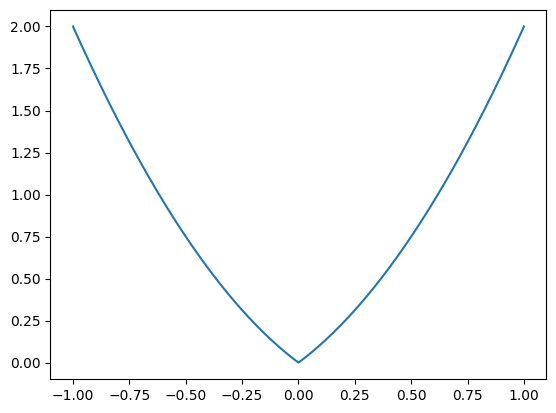

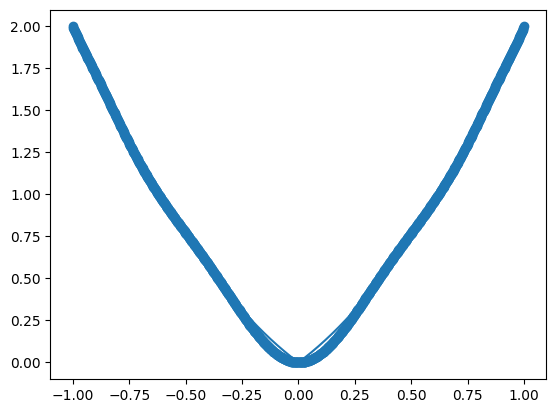

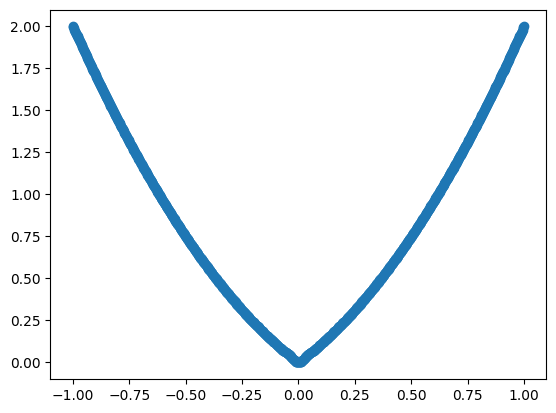

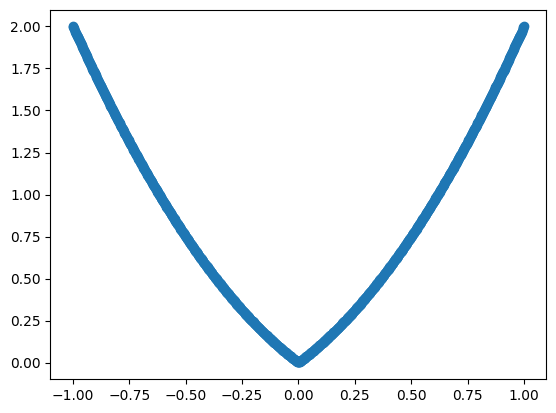

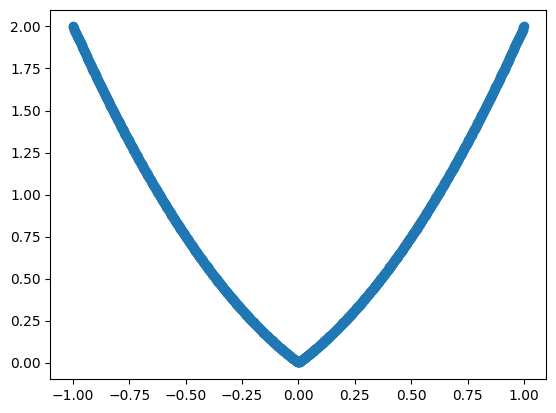

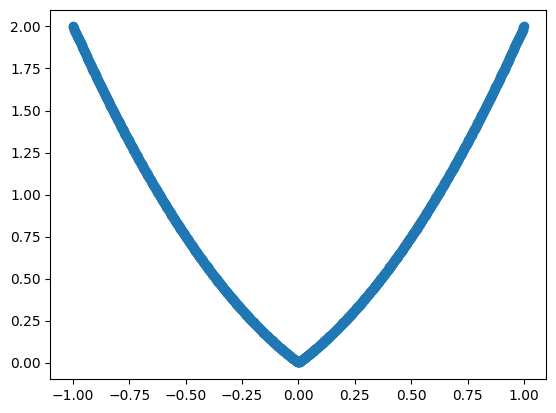

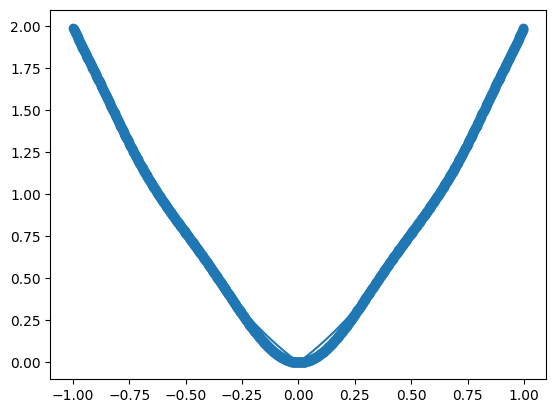

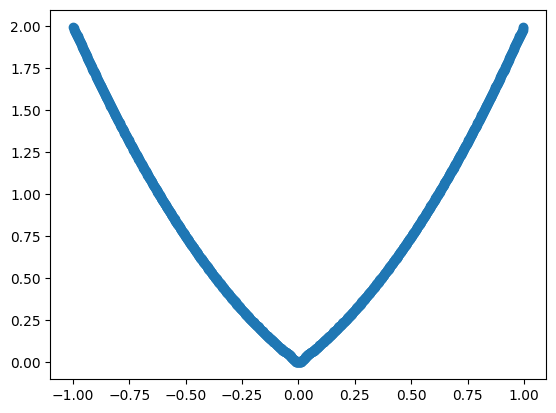

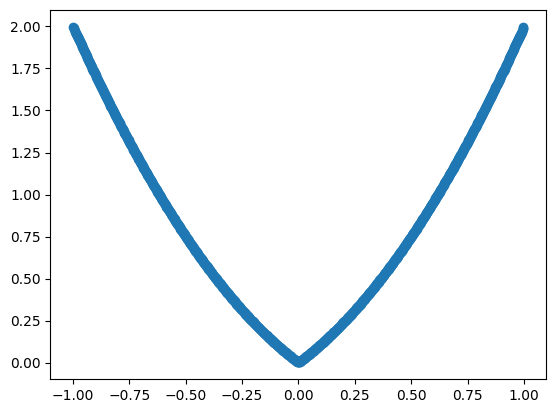

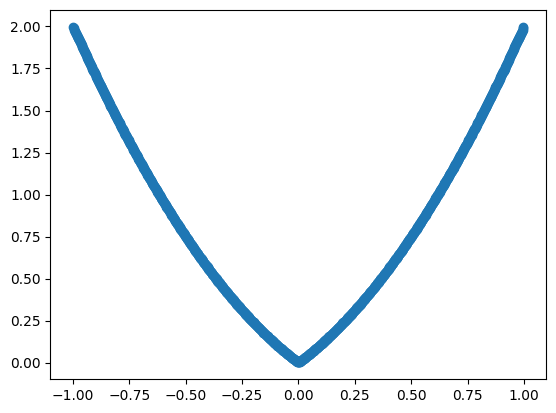

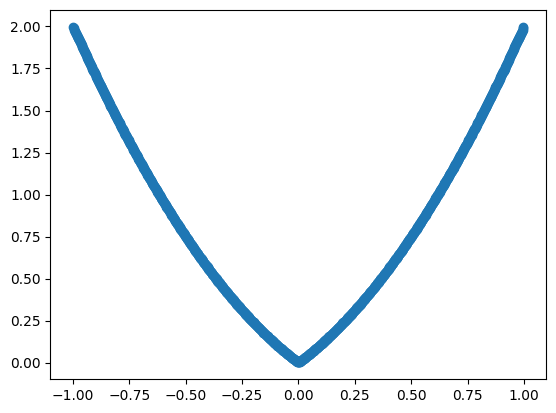

In [3]:
from main import bar_czeb_weights, barycentric_inte, chebyshev_nodes, nierozniczkowalna
from scipy.interpolate import barycentric_interpolate
#argumenty
arg = [10,100,1000,10000,100000]

x = np.linspace(-1, 1, 1000)
plt.figure(0)
plt.plot(x, nierozniczkowalna(x))
wykr = 1;
#węzły
xi = [0, 0, 0, 0, 0]
sum = 0
for i in arg:
    xi[sum] = chebyshev_nodes(i)
    sum += 1
    
#wagi
wi = [0, 0, 0, 0, 0]
sum = 0
for i in arg:
    wi[sum] = bar_czeb_weights(i)
    sum += 1
    
#wartości
yi = [0,0,0,0,0]
for i in range(len(arg)):
    yi[i] = nierozniczkowalna(xi[i])
    
    
#funkcja wbudowana
ywb = [0,0,0,0,0]
for i in range(len(arg)):
    ywb[i] = barycentric_interpolate(xi[i], yi[i], x)
    plt.figure(wykr)
    plt.plot(x, nierozniczkowalna(x))
    plt.scatter(x, ywb[i])
    wykr += 1
    
    t = %timeit -r 10 -n 10 -o -q barycentric_interpolate(xi[i], yi[i], x)
    print("Czas dla rzędu: ", arg[i])
    print(t.average)
    
#nasza funkcja
yna = [0,0,0,0,0]
for i in range(len(arg)):
    yna[i] = barycentric_inte(xi[i], yi[i], wi[i], x)
    plt.figure(wykr)
    plt.plot(x, nierozniczkowalna(x))
    plt.scatter(x, yna[i])
    wykr += 1

    t = %timeit -r 10 -n 10 -o -q barycentric_inte(xi[i], yi[i], wi[i], x)
    print("Czas dla rzędu: ", arg[i])
    print(t.average)


Jak widać, już dla interpolacji rzędu 1000 otrzymujemy funkcję niemal identyczną z funcją rzeczywistą, zarówno w przypadku funkcji wbudowanej, jak i zaimplementowanej przez nas. Czas potrzebny na wykonanie wszystkich operacji rośnie wraz ze wzrostem rzędu interpolacji. W przypadku funkcji wbudowanej rośnie nieliniowo, skokowo, maksymalny czas wynosi około 79s dla rzędu 100000. Dla naszej funkcji czas wykonywania obliczeń rośnie praktycznie liniowo, gdy rząd rośnie 10-krotnie, czas obliczeń również zwiększa się około 10 razy. Maksymalny czas obliczeń wynosi w przypadku naszej funkcji około 122s. Całość obliczeń, łącznie z powtórzeniami wyniosła około 6h.

In [2]:
#analiza jakości wyników dla różnych rzędów
from main import bar_czeb_weights, chebyshev_nodes, nierozniczkowalna, L_inf
from scipy.interpolate import barycentric_interpolate
#argumenty
arg = [10,100,1000,10000,100000]

x = np.linspace(-1, 1, 1000)

#węzły
xi = [0, 0, 0, 0, 0]
sum = 0
for i in arg:
    xi[sum] = chebyshev_nodes(i)
    sum += 1
    
#wagi
wi = [0, 0, 0, 0, 0]
sum = 0
for i in arg:
    wi[sum] = bar_czeb_weights(i)
    sum += 1
    
#wartości
yi = [0,0,0,0,0]
for i in range(len(arg)):
    yi[i] = nierozniczkowalna(xi[i])
    
    
#funkcja wbudowana
ywb = [0,0,0,0,0]
for i in range(len(arg)):
    ywb[i] = barycentric_interpolate(xi[i], yi[i], x)
    jakosc = L_inf(nierozniczkowalna(x), ywb[i])
    print("Norma L_inf dla rzędu: ", arg[i])
    print(jakosc)


Norma L_inf dla rzędu:  10
0.05921962436810328
Norma L_inf dla rzędu:  100
0.005965418924417072
Norma L_inf dla rzędu:  1000
0.0005739642836656043
Norma L_inf dla rzędu:  10000
8.30350512856363e-06
Norma L_inf dla rzędu:  100000
6.55051314811788e-08


Jak widać, wraz ze wzrostem rzędu interpolacji, rośnie jakość wyników. Dla rzędu 1000 wyniki są już bardzo dokładne. 

***Zadanie 5.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 

W tym celu należy:
- wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów (nie będącymi węzłami interpolacji np. punkty równoodległe),
- wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu, maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
- dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu,
- dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

Norma 1 L_inf dla rzędu:  10
0.007616055567867578


Norma 3 L_inf dla rzędu:  10
0.11562067304989793


Norma 1 L_inf dla rzędu:  100
5.420274640370246e-06


Norma 1 L_inf dla rzędu:  1000
6.123101001925813e-10


Norma 1 L_inf dla rzędu:  10000
5.987051132638754e-14


Norma 1 L_inf dla rzędu:  100000
3.885780586188048e-16


Norma 3 L_inf dla rzędu:  100
7.635818296031216e-05


Norma 3 L_inf dla rzędu:  1000
8.329448769606174e-09


Norma 3 L_inf dla rzędu:  10000
8.376632720796806e-13




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Norma 3 L_inf dla rzędu:  100000
2.9976021664879227e-15




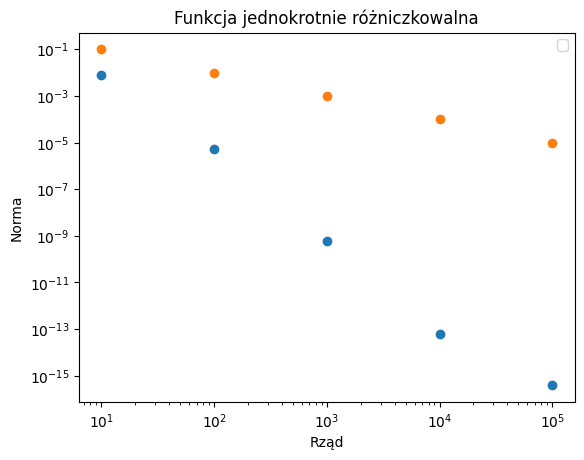

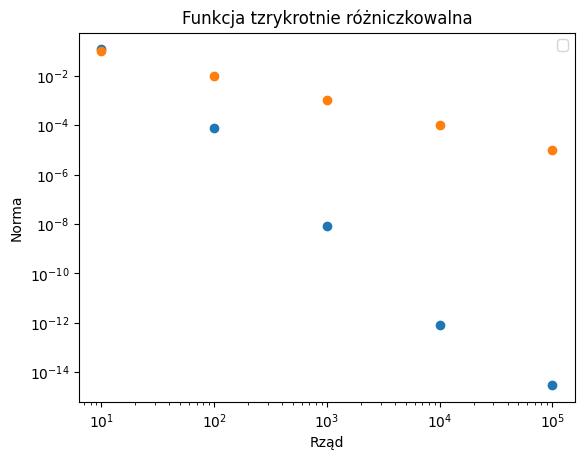

In [11]:
from main import bar_czeb_weights, chebyshev_nodes, rozniczkowalna_jednokrotnie, rozniczkowalna_trzyrotnie, L_inf
from scipy.interpolate import barycentric_interpolate
#argumenty
arg = 10

x = np.linspace(-1, 1, 10)
argumenty1 = []
argumenty1.append(arg)
argumenty3 = []
argumenty3.append(arg)
jakosci1 = []
jakosci3 = []
#węzły
xi = chebyshev_nodes(arg)
    
#wagi
wi = bar_czeb_weights(arg)
    
#wartości
yi1 = rozniczkowalna_jednokrotnie(xi)
yi3 = rozniczkowalna_trzyrotnie(xi)
       
#funkcja wbudowana
ywb1 = barycentric_interpolate(xi, yi1, x)
ywb3 = barycentric_interpolate(xi, yi3, x)
jakosc1 = L_inf(rozniczkowalna_jednokrotnie(x), ywb1)
jakosci1.append(jakosc1)
jakosc3 = L_inf(rozniczkowalna_trzyrotnie(x), ywb3)
jakosci3.append(jakosc3)
print("Norma 1 L_inf dla rzędu: ", arg)
print(jakosc1)
print('\n')
print("Norma 3 L_inf dla rzędu: ", arg)
print(jakosc3)
print('\n')

while(jakosc1 > 0 and arg <= 10000):
    arg = arg*10
    argumenty1.append(arg)
    xi = chebyshev_nodes(arg)
    
    #wagi
    wi = bar_czeb_weights(arg)
        
    #wartości
    yi1 = rozniczkowalna_jednokrotnie(xi)
        
    #funkcja wbudowana
    ywb1 = barycentric_interpolate(xi, yi1, x)
    jakosc1 = L_inf(rozniczkowalna_jednokrotnie(x), ywb1)
    jakosci1.append(jakosc1)
    print("Norma 1 L_inf dla rzędu: ", arg)
    print(jakosc1)
    print('\n')

arg = 10    
while(jakosc3 > 0 and arg <= 10000):
    arg = arg*10
    argumenty3.append(arg)
    xi = chebyshev_nodes(arg)
    
    #wagi
    wi = bar_czeb_weights(arg)
        
    #wartości
    yi3 = rozniczkowalna_trzyrotnie(xi)
        
    #funkcja wbudowana
    ywb3 = barycentric_interpolate(xi, yi3, x)
    jakosc3 = L_inf(rozniczkowalna_trzyrotnie(x), ywb3)
    jakosci3.append(jakosc3)
    print("Norma 3 L_inf dla rzędu: ", arg)
    print(jakosc3)
    print('\n')

plt.figure(0)    
plt.scatter(argumenty1, jakosci1)
power1 = []
for x in argumenty1:
    power1.append(x**(-1))
argumenty1 = np.array(argumenty1)
plt.scatter(argumenty1, power1)
plt.title("Funkcja jednokrotnie różniczkowalna")
plt.xlabel("Rząd")
plt.ylabel("Norma")
plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.figure(1)    
plt.scatter(argumenty3, jakosci3)
power3 = []
for x in argumenty3:
    power3.append(x**(-1))
argumenty3 = np.array(argumenty3)
plt.scatter(argumenty3, power3)
plt.title("Funkcja tzrykrotnie różniczkowalna")
plt.xlabel("Rząd")
plt.ylabel("Norma")
plt.yscale('log')
plt.xscale('log')
plt.legend()

Ze względu na bardzo długi czas obliczeń przeprowadziłem analizę dla zmniejszonej liczby argumentów. Jak widać im większy rząd, tym dokładniejsze wyniki otrzymujemy. Przy rzędzie równym 100000 lub więcej otrzymujemy niemal idealne odwzorowanie. 

***Zadanie 6.***  
Dla funkcji nieciągłej przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

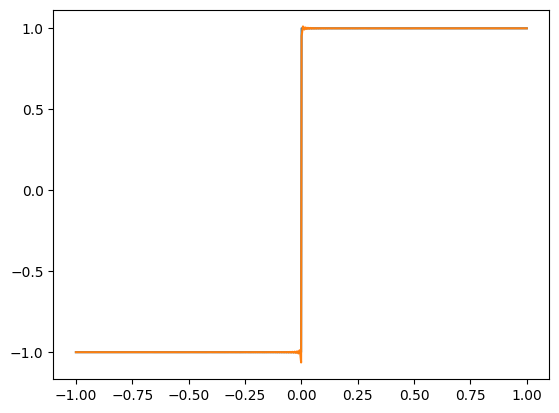

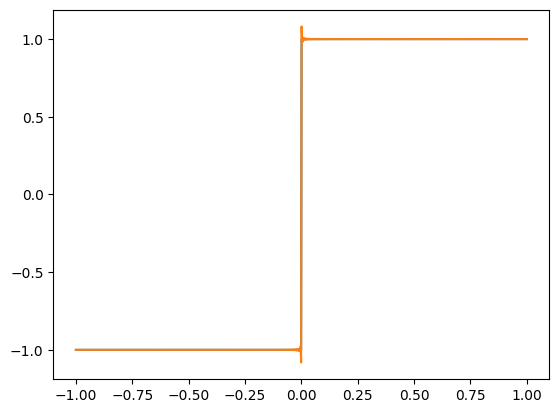

In [15]:
from main import nieciagla
x = np.linspace(-1, 1, 1000)

arg = 10000

xi = chebyshev_nodes(arg)

yi = nieciagla(xi)

ywb = barycentric_interpolate(xi, yi, x)
plt.figure(0)
plt.plot(x, nieciagla(x))
plt.plot(x, ywb)

arg = 10001

xi = chebyshev_nodes(arg)

yi = nieciagla(xi)

ywb = barycentric_interpolate(xi, yi, x)
plt.figure(1)
plt.plot(x, nieciagla(x))
plt.plot(x, ywb)

Na załączonych wykresach możemy zaobserwować efekt Gibbsa, który nie może być zniwelowany, poprzez zwiększenie rzędu interpolacji. Występuje on w przypadku interpolacji funkcji nieciągłych. Dla rzędów nieparzystych jest bardziej widoczny niż dla parzystych. 

Wnioski:

Metoda interpolacji jest metodą pozwalającą w dokładny sposób odwzorować funkcje ciągłe. Stosując tą metodę musimy znaleźć balans między dokładnością odwzorowania, a czasem obliczeń, ponieważ jest to metoda czasochłonna i wraz ze wzrostem rzędu interpolacji, rośnie dokładność wyników, ale również czas wykonywania obliczeń (obliczenia mogą zająć nawet wiele godzin). Dla funkcji nieciągłych możemy zaobserwować efekt Gibbsa - w punktach nieciągłości widzimy duże wahania wartości funkcji. Nie można go zniwelować zwiększając rząd interpolacji.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)